In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cardekho_data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
num_col = ["Year","Selling_Price","Present_Price","Kms_Driven","Owner"]

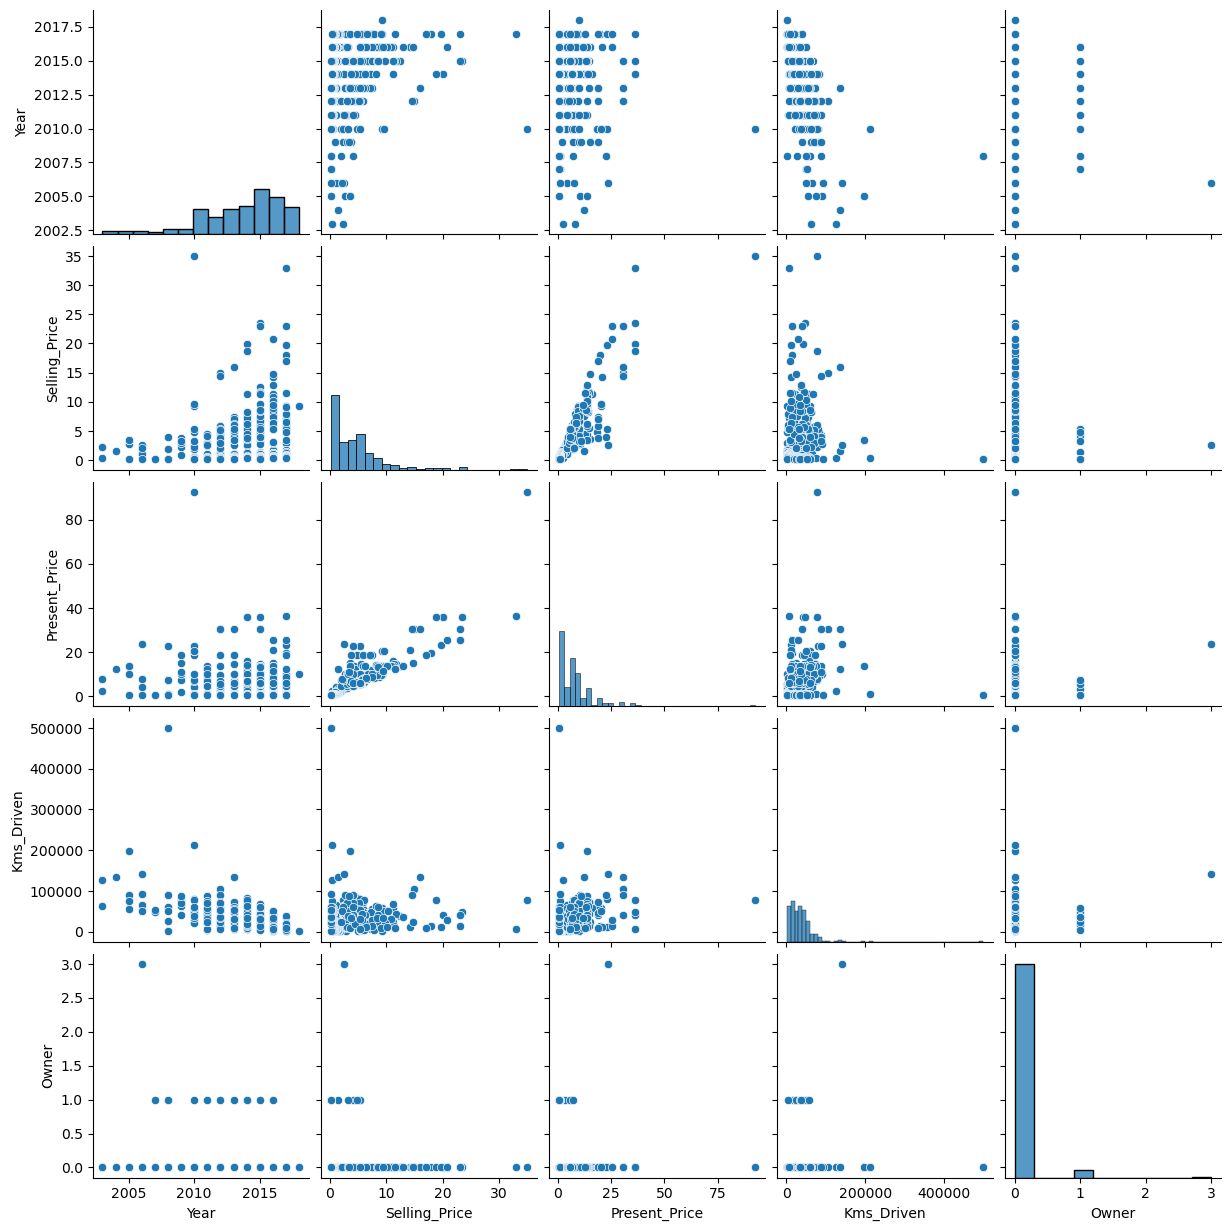

In [9]:
sns.pairplot(df[num_col])

<Axes: >

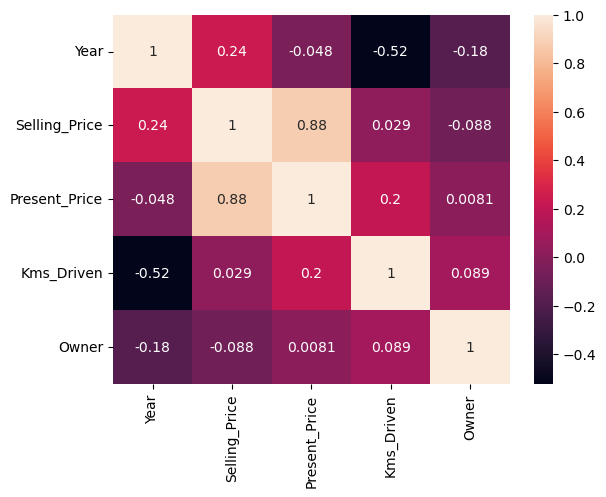

In [15]:
sns.heatmap(df[num_col].corr(),annot=True)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
cat_cols = ["Fuel_Type","Seller_Type","Transmission"]

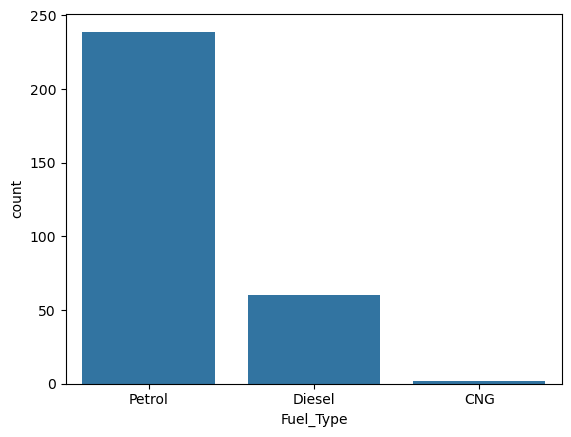

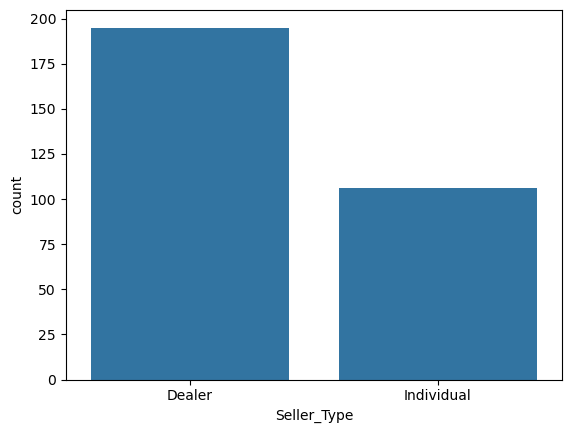

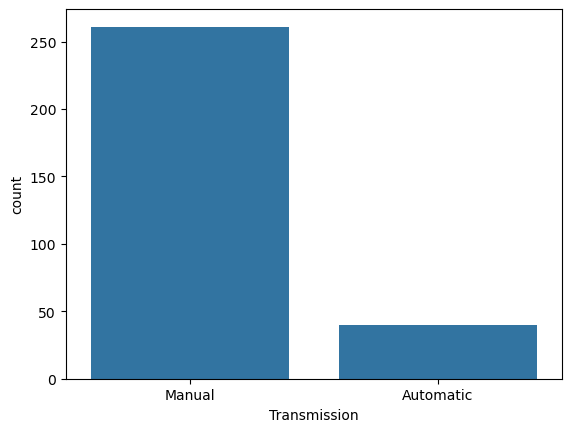

In [23]:
for i in cat_cols:
    sns.countplot(x=i,data=df)
    plt.show()

In [29]:
df.drop("Car_Name",axis=1,inplace = True)

In [31]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label = LabelEncoder()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [47]:
for i in df.select_dtypes(include=["object"]).columns:
    df[i] = label.fit_transform(df[i])

In [49]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [55]:
X = df.drop("Selling_Price",axis = 1)
y = df["Selling_Price"]

In [57]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [137]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [139]:
y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import r2_score

In [143]:
r2_score(y_test,y_pred)

0.960701966521317

In [145]:
# RandomizedSearchCV()

In [153]:
param = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [None,5,10,15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [155]:
random = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_distributions=param,
    n_iter = 20,
    cv = 3,
    n_jobs = -1,
    verbose = 1,
    random_state = 42
)
random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [157]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [159]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [167]:
estimators = random.best_estimator_

In [169]:
y_best = estimators.predict(X_test)

In [173]:
r2_score(y_test,y_best)

0.9597408335991902

In [175]:
r2_score(y_test,y_pred)

0.960701966521317

In [183]:
import pickle
with open("model.pkl","wb") as fs:
    pickle.dump(model,fs)